In [1]:
## Install or update the yellowbrick
! pip install -U yellowbrick


     |████████████████████████████████| 282 kB 991 kB/s eta 0:00:01
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 1.4
    Uninstalling yellowbrick-1.4:
      Successfully uninstalled yellowbrick-1.4


In [54]:
!pip install git+https://github.com/huggingface/transformers sentencepiece datasets


  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-0lbo_0xw
  Running command git clone -q https://github.com/huggingface/transformers /tmp/pip-req-build-0lbo_0xw
  Resolved https://github.com/huggingface/transformers to commit c612628045822f909020f7eb6784c79700813eda
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 468 kB 855 kB/s eta 0:00:01
     |████████████████████████████████| 212 kB 867 kB/s eta 0:00:01
     |████████████████████████████████| 132 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 34.9 MB 595 kB/s eta 0:00:01
  Created wheel for transformers: filename=transformers-4.28.0.dev0-py3-none-any.whl size=6858413 sha256=764dc64196b0b71bfb23cc46a14e7c35b121e65268814423b5d5e176f73c4447
  Stored in directory: /tmp/pip-ephem-wheel-cache-0ja76_z5/wheels/14/a0/7b/8f6b25ba4110aa215fcb8d6aedd6cd4f9b9b6619190999ac2b
Successfull

In [27]:
import pandas as pd
import yellowbrick
from yellowbrick.datasets import load_bikeshare
import warnings
warnings.filterwarnings("ignore")


In [32]:
X, y = load_bikeshare()
print(X.head())

   season  year  month  hour  holiday  weekday  workingday  weather  temp  \
0       1     0      1     0        0        6           0        1  0.24   
1       1     0      1     1        0        6           0        1  0.22   
2       1     0      1     2        0        6           0        1  0.22   
3       1     0      1     3        0        6           0        1  0.24   
4       1     0      1     4        0        6           0        1  0.24   

   feelslike  humidity  windspeed  
0     0.2879      0.81        0.0  
1     0.2727      0.80        0.0  
2     0.2727      0.80        0.0  
3     0.2879      0.75        0.0  
4     0.2879      0.75        0.0  


,season,year,month,hour,holiday,weekday,workingday,weather,temp,feelslike,humidity,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


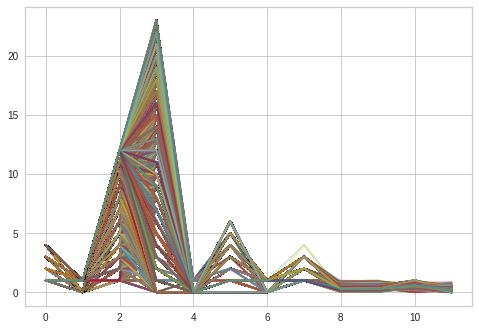

In [6]:
from yellowbrick.features import ParallelCoordinates

visualizer = ParallelCoordinates()
visualizer.fit_transform(X, y)
# visualizer.show()

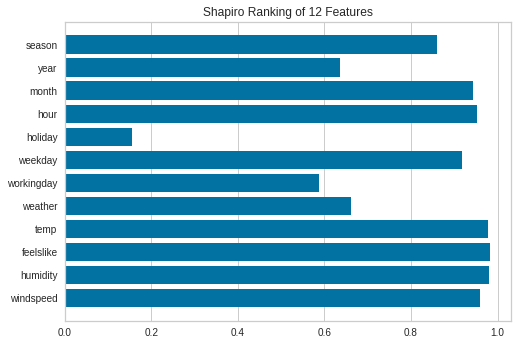

<AxesSubplot:title={'center':'Shapiro Ranking of 12 Features'}>

In [29]:
from yellowbrick.features import Rank1D

visualizer = Rank1D(algorithm="shapiro")
visualizer.fit_transform(X)
visualizer.show()

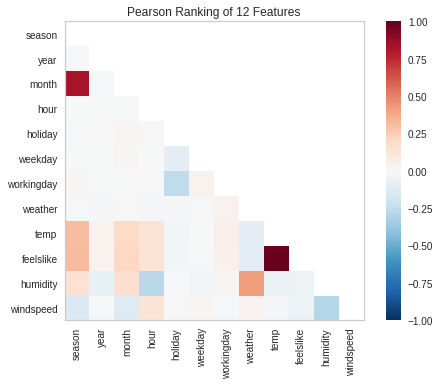

<AxesSubplot:title={'center':'Pearson Ranking of 12 Features'}>

In [30]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.show()

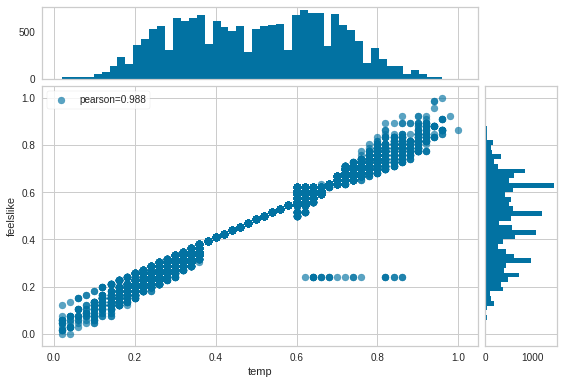

<AxesSubplot:xlabel='temp', ylabel='feelslike'>

In [22]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=['temp','feelslike'])
visualizer.fit_transform(X, y)
visualizer.show()

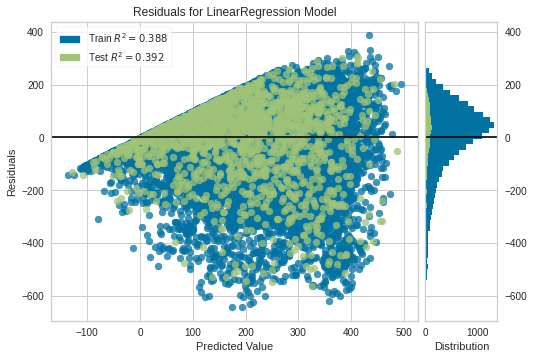

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [11]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

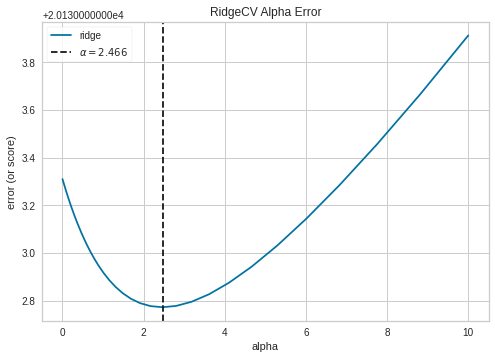

<AxesSubplot:title={'center':'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [12]:
import numpy as np

from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.show()

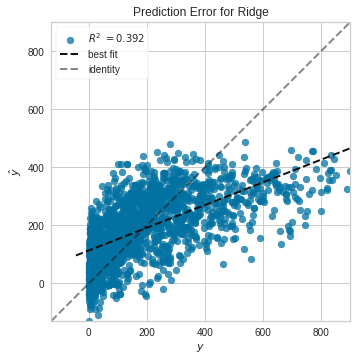

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [13]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(Ridge(alpha=3.181))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

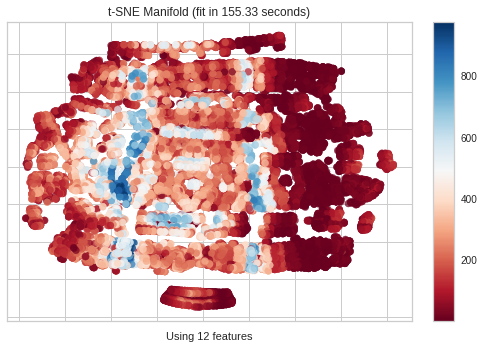

<AxesSubplot:title={'center':'t-SNE Manifold (fit in 155.33 seconds)'}, xlabel='Using 12 features'>

In [34]:
from yellowbrick.features import Manifold

# Instantiate the visualizer
viz = Manifold(manifold="tsne",n_neighbors=5)

viz.fit_transform(X, y)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure


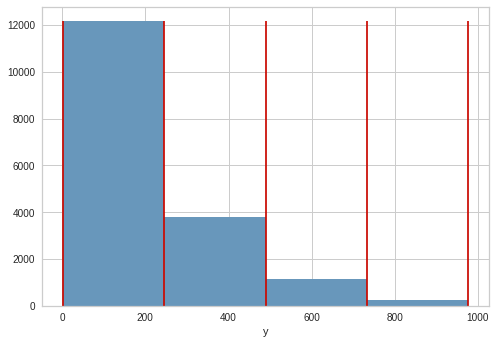

BalancedBinningReference(ax=<AxesSubplot:xlabel='y'>, target='y')

In [35]:
from yellowbrick.target import balanced_binning_reference
# Use the quick method and immediately show the figure
balanced_binning_reference(y)

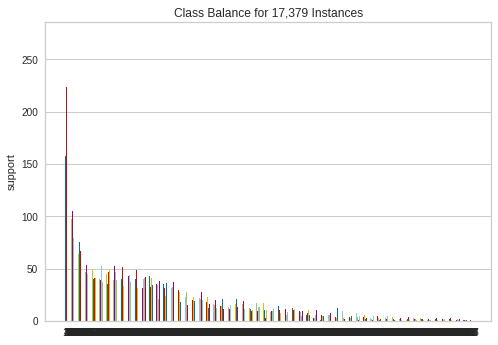

ClassBalance(ax=<AxesSubplot:title={'center':'Class Balance for 17,379 Instances'}, ylabel='support'>)

In [36]:
from yellowbrick.target import class_balance

# Use the quick method and immediately show the figure
class_balance(y)

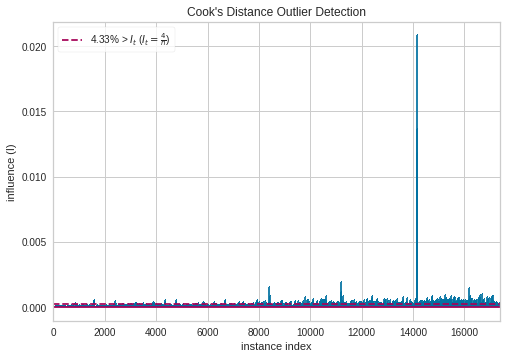

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [37]:
from yellowbrick.regressor import CooksDistance
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

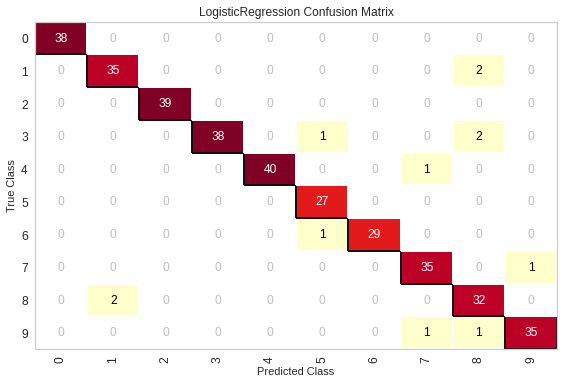

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [40]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = tts(X, y, test_size =0.2, random_state=11)

model = LogisticRegression(multi_class="auto", solver="liblinear")

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

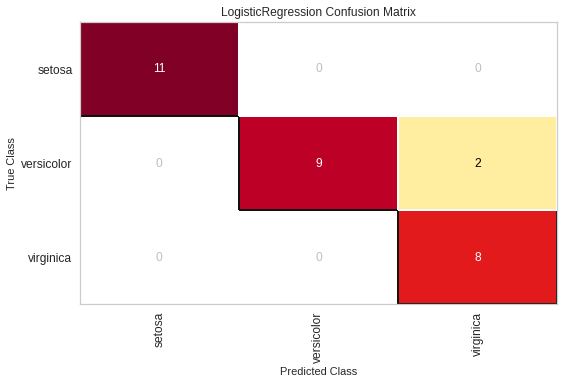

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [41]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

from yellowbrick.classifier import ConfusionMatrix

iris = load_iris()
X = iris.data
y = iris.target
classes = iris.target_names

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

model = LogisticRegression(multi_class="auto", solver="liblinear")

iris_cm = ConfusionMatrix(
    model, classes=classes,
    label_encoder={0: 'setosa', 1: 'versicolor', 2: 'virginica'}
)

iris_cm.fit(X_train, y_train)
iris_cm.score(X_test, y_test)
iris_cm.show()
